In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from activ import load_data
from PyUoI.UoINMF import UoINMF
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import CCA
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
nmfdata = load_data(uoinmf=True)

In [33]:
bm_factors = nmfdata.biomarkers
oc_factors = nmfdata.outcomes

In [34]:
cca = CCA(n_components=1)
cca.fit(bm_factors, oc_factors)
X_c, Y_c = cca.transform(bm_factors, oc_factors)

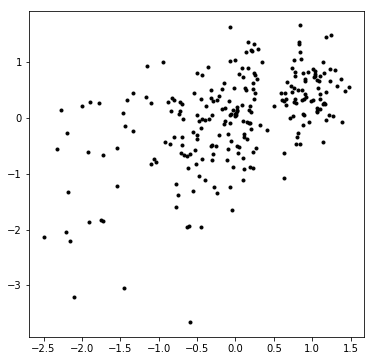

In [44]:
plt.figure(figsize=(6,6))
plt.plot(cca.x_scores_, cca.y_scores_, '.', color='black')

In [37]:
X_c

array([[ 7.30158862e-01],
       [ 9.77027756e-02],
       [ 2.46296969e-01],
       [ 1.15273450e+00],
       [ 1.00809886e+00],
       [ 7.75922432e-01],
       [-3.08092502e-01],
       [ 8.83340991e-01],
       [-1.53910513e+00],
       [ 1.27475435e+00],
       [ 1.03011785e+00],
       [-4.52911345e-01],
       [ 8.43044590e-01],
       [-2.52086902e-01],
       [ 1.14244620e+00],
       [-7.38234348e-01],
       [ 7.91224277e-01],
       [ 1.14473826e-01],
       [-1.72941259e+00],
       [-7.24188124e-01],
       [-7.75711042e-01],
       [-1.41506382e-01],
       [-2.26652021e+00],
       [-5.11596576e-01],
       [-1.15518990e-01],
       [-7.39264185e-02],
       [-3.55589443e-01],
       [-2.15817346e+00],
       [-2.21236030e+00],
       [-7.08781577e-01],
       [-2.77531509e-01],
       [-6.05508198e-01],
       [-8.37577717e-01],
       [-1.90877587e+00],
       [-7.02327906e-01],
       [-5.97798567e-01],
       [-8.52098931e-01],
       [-4.40200879e-01],
       [ 1.9

In [6]:
# R2
r2 = r2_score(X_c, Y_c)a
r2


0.09676005691361689

In [7]:
X_c = np.squeeze(X_c)
Y_c = np.squeeze(Y_c)
X_c.shape

(247,)

In [8]:
slope, intercept = np.polyfit(X_c, Y_c, 1)
abline_values = [slope * i + intercept for i in X_c]


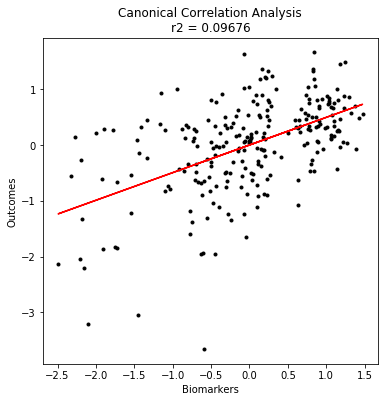

In [9]:
plt.figure(figsize=(6,6))
plt.xlabel('Biomarkers')
plt.ylabel('Outcomes')
plt.title('Canonical Correlation Analysis\nr2 = 0.09676')
plt.plot(X_c, Y_c, '.', color='black')
plt.plot(X_c, abline_values, color='red')
plt.savefig('/Users/ahyeon/Desktop/activ misc/cca.pdf')

In [42]:
data = load_data(uoinmf=False)
data_oc = data.outcomes
data_bm = data.biomarkers

In [48]:
rf = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(cca.x_scores_, cca.y_scores_, test_size=0.2)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.08739698510342375